In [1]:
%pylab inline
from utils import *
from data import *
from scoring import *

Populating the interactive namespace from numpy and matplotlib


# Some general notes

* The data has been perpared by running add_measures.py, which adds avg and stddev of speed and course for various sizes of a rolling window (from 30min to 24h).

* We use a simple logistical regression with polynomial features and a small regularization (lambda = 0.0001) to get around numerical rounding problems

* We determine, for each gear type, what the optimal window size is by running the regression for each window size and a fixed polynomial degree.

* We determine, for each gear type, what the optimal degree of the polynomial is by running the regression for each degree of polynomial with a fixed window size.

* We can't easily automatically derive the grade of the polynomial from the regression over polynomial length, since the graph only flattens out, it doesn't have a minima, so it's a judgement call what is "good enough". Therefore the grade parameter has been hard-coded below, after examining the graph for grade vs cross validation error.

# Longliners
## Longliners using Alex' data
Train the algorithm using Alex' data, then evaluate on both Alex' and Kristinas data

Fitting an optimal window size for avg/stddev columns
1800: Fitting... Scoring... Calc.err... train=0.0261881145756, cross=0.152250766835
3600: Fitting... Scoring... Calc.err... train=0.0257458499483, cross=0.144644913324
10800: Fitting... Scoring... Calc.err... train=0.0209807446088, cross=0.117784216992
21600: Fitting... Scoring... Calc.err... train=0.0190923449053, cross=0.10895717896
43200: Fitting... Scoring... Calc.err... train=0.01781834, cross=0.10419218
86400: Fitting... Scoring... Calc.err... train=0.01895098, cross=0.10993316


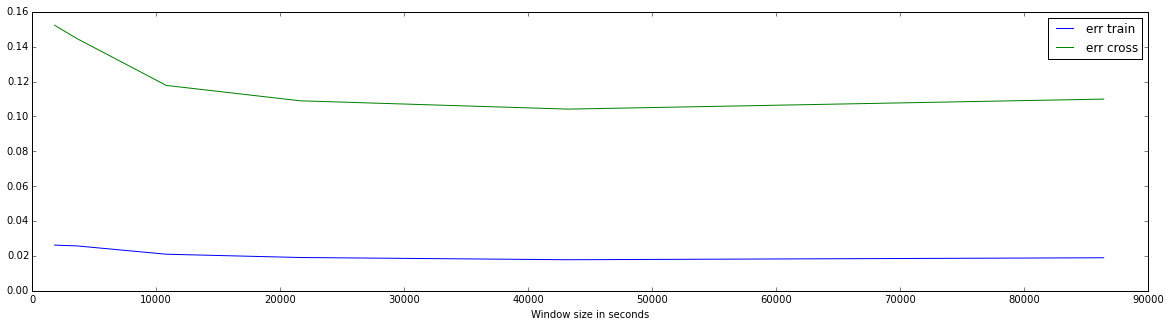

Best window size: 43200
Fitting an optimal degree of polynomial
2: Fitting... Scoring... Calc.err... train=0.01797513, cross=0.10375818
3: Fitting... Scoring... Calc.err... train=0.01785505, cross=0.10468596
4: Fitting... Scoring... Calc.err... train=0.01783359, cross=0.1038947
5: Fitting... Scoring... Calc.err... train=0.01784189, cross=0.10454454
6: Fitting... Scoring... Calc.err... train=0.01761094, cross=0.10359856
7: Fitting... Scoring... Calc.err... train=0.01773278, cross=0.10398924
8: Fitting... Scoring... Calc.err... train=0.01775761, cross=0.10460194
9: Fitting... Scoring... Calc.err... train=0.01774085, cross=0.10416822


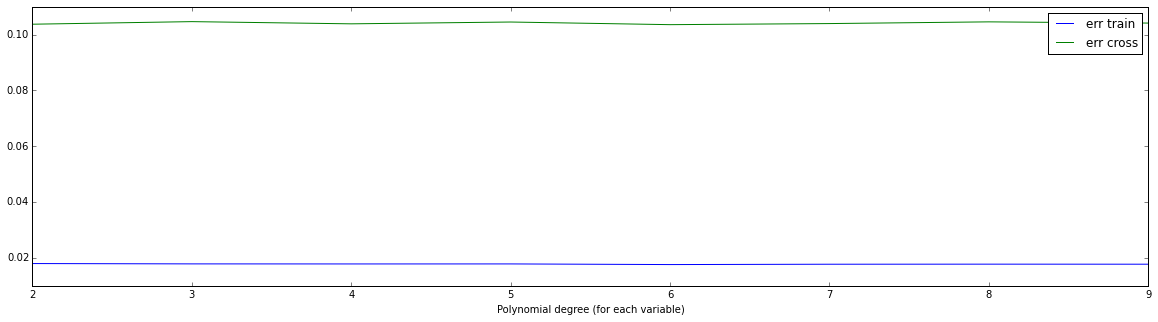

Evaluation using Alex' data:


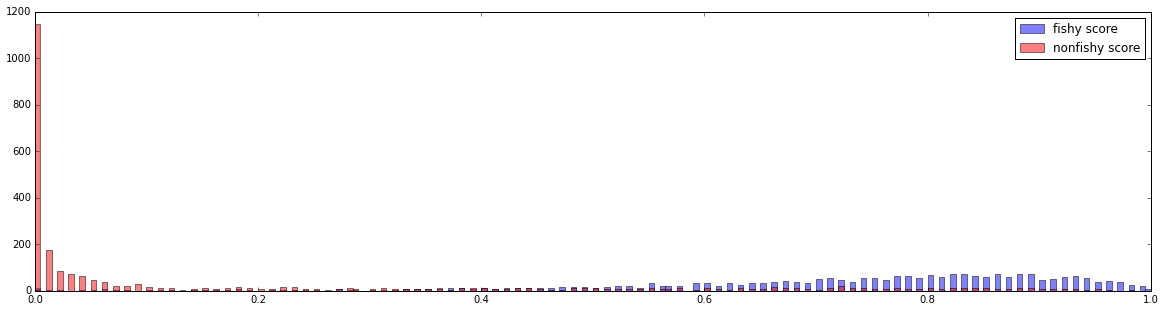

Squared numerical error: 0.1037108
Error (overlap): 27.44%
False positives given cutoff at 0.5: 33.2314744079%


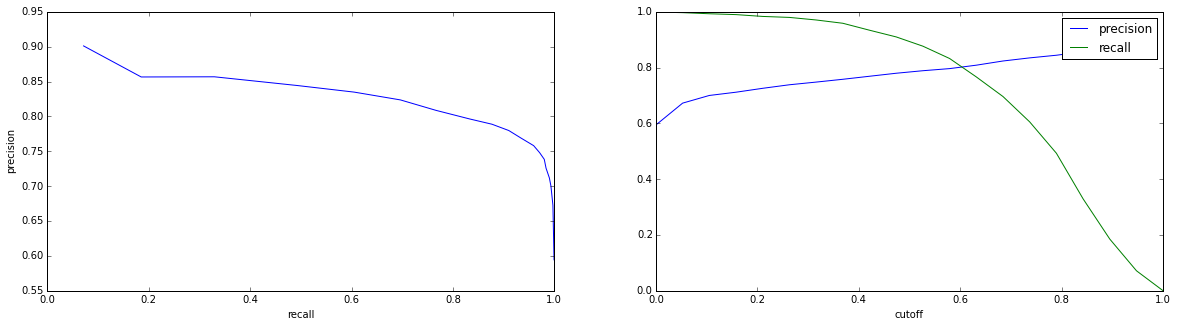

Score window: 43200
Evaluate using Kristinas data:


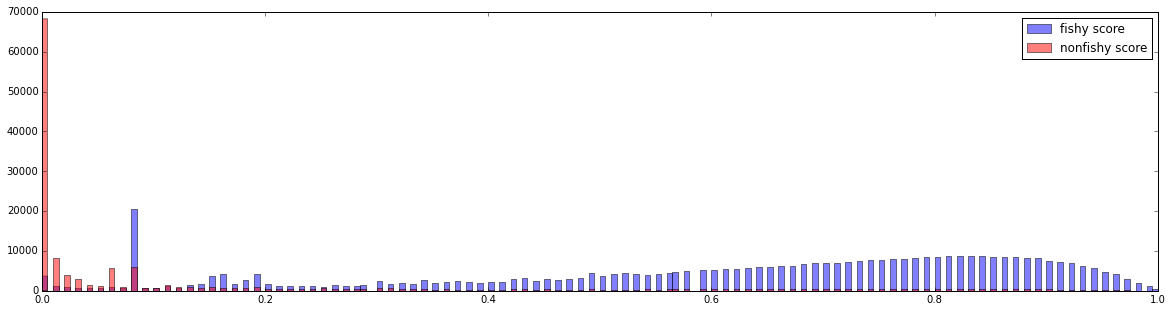

Squared numerical error: 0.181904990834
Error (overlap): 19.233578693%
False positives given cutoff at 0.5: 10.6741302516%


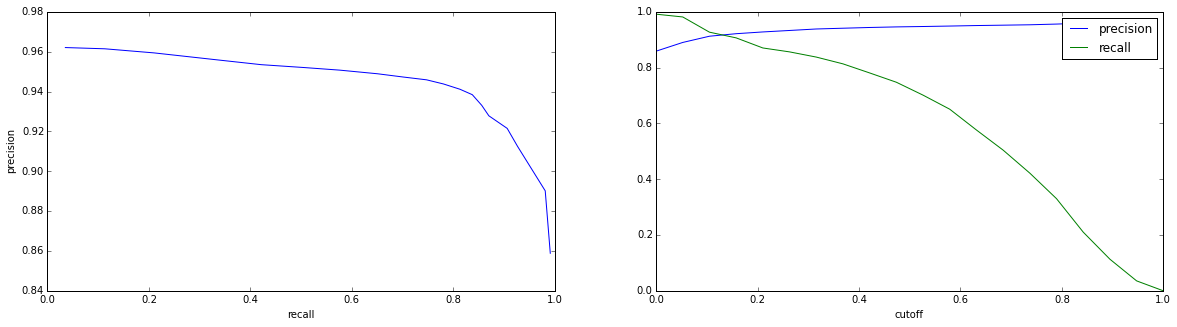

Score window: 43200


In [2]:
x, xtrain, xcross, xtest = load_dataset('classified-filtered.npz')
_x, _xtrain, _xcross, _xtest = load_dataset('datasets/kristina_longliner.measures.npz')
min_window = optimize_window_size(xtrain, xcross)
optimize_polynomial_degree(xtrain, xcross, min_window)
print "Evaluation using Alex' data:"
evaluate_score(xtrain, xtest, 5, min_window)
print "Evaluate using Kristinas data:"
evaluate_score(xtrain, _x, 5, min_window)

# Score all of Kristinas data and save it
train_and_score(xtrain, _x, 5, min_window)
numpy.savez_compressed("datasets/kristina_longliner.alex-scores.npz", x=_x.filled())

# Longliners using Kristinas' data
Train the algorithm using Kristinas data, and evaluate using a separate subset of Kristinas data.

Fitting an optimal window size for avg/stddev columns
1800: Fitting... Scoring... Calc.err... train=0.0304213408147, cross=0.135510398273
3600: Fitting... Scoring... Calc.err... train=0.0263020660708, cross=0.130708612879
10800: Fitting... Scoring... Calc.err... train=0.018218318158, cross=0.108135459331
21600: Fitting... Scoring... Calc.err... train=0.0153673855506, cross=0.103486367862
43200: Fitting... Scoring... Calc.err... train=0.0118005277705, cross=0.08305090125
86400: Fitting... Scoring... Calc.err... train=0.0116804943867, cross=0.081675645


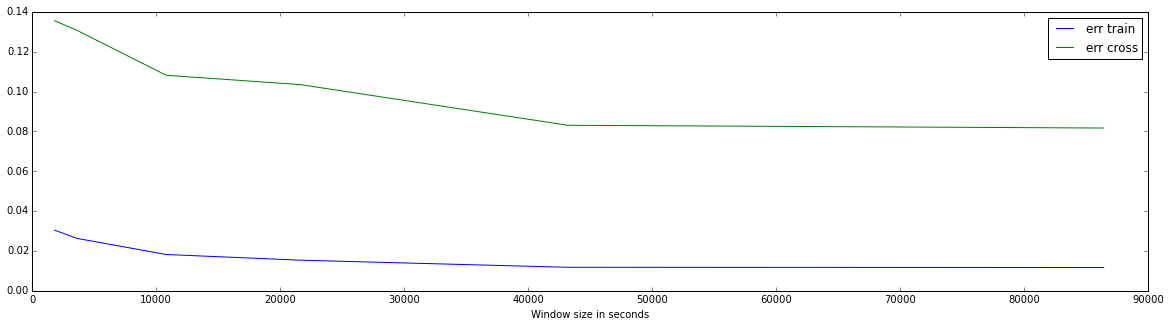

Best window size: 86400
Fitting an optimal degree of polynomial
2: Fitting... Scoring... Calc.err... train=0.0115571425, cross=0.0814648525
3: Fitting... Scoring... Calc.err... train=0.0115584168056, cross=0.08164662
4: Fitting... Scoring... Calc.err... train=0.0116889989389, cross=0.08104894
5: Fitting... Scoring... Calc.err... train=0.0116986208235, cross=0.0820681084722
6: Fitting... Scoring... Calc.err... train=0.0115172326389, cross=0.081491725
7: Fitting... Scoring... Calc.err... train=0.0116527419444, cross=0.0814091088889
8: Fitting... Scoring... Calc.err... train=0.0118789949778, cross=0.0811538405556
9: Fitting... Scoring... Calc.err... train=0.0116555954222, cross=0.0816788161111


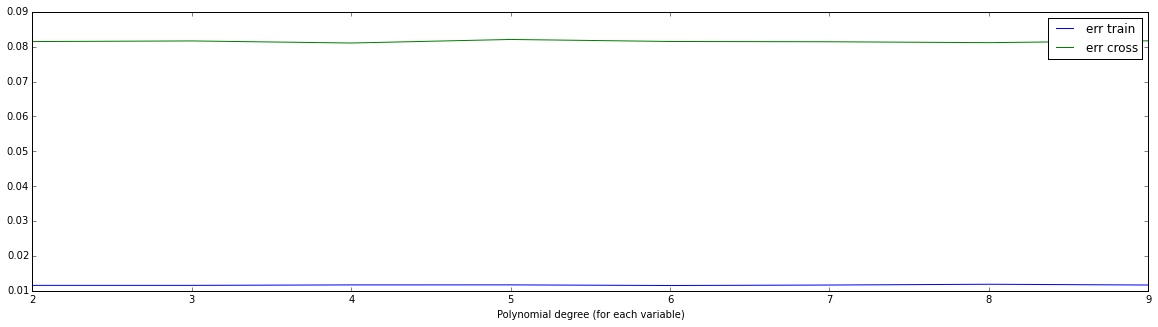

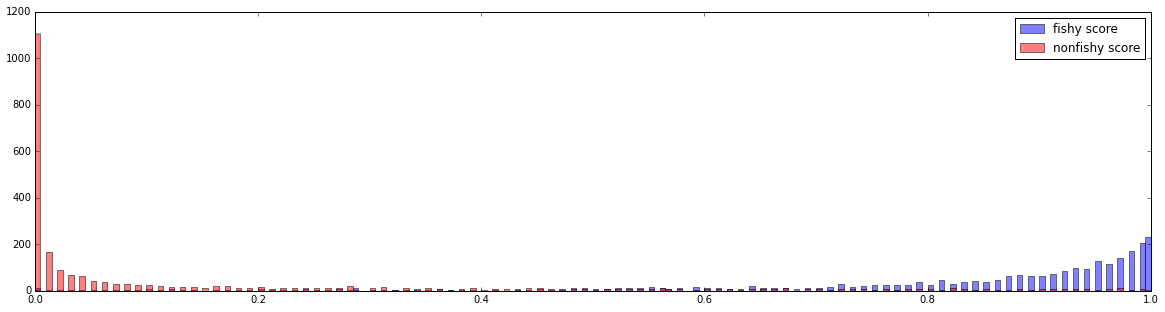

Squared numerical error: 0.0829749005556
Error (overlap): 20.88%
False positives given cutoff at 0.5: 24.5403377111%


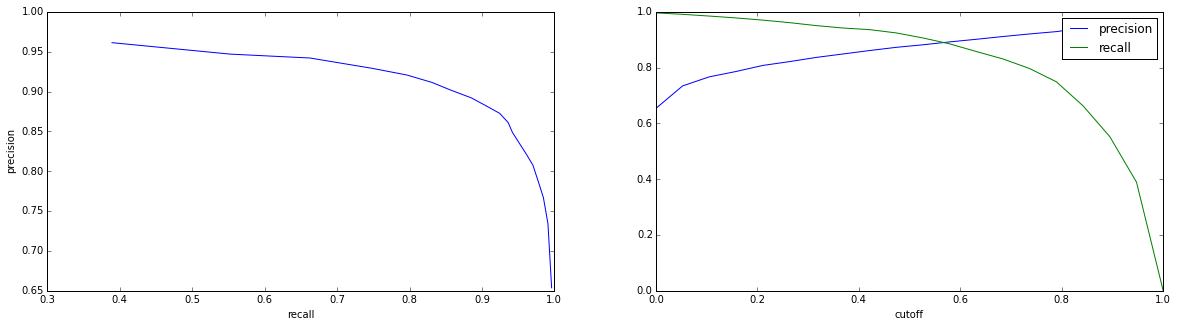

Score window: 86400


In [3]:
x, xtrain, xcross, xtest = load_dataset('datasets/kristina_longliner.measures.npz')
min_window = optimize_window_size(xtrain, xcross)
optimize_polynomial_degree(xtrain, xcross, min_window)
evaluate_score(xtrain, xtest, 5, min_window)

train_and_score(xtrain, x, 5, min_window)
numpy.savez_compressed("datasets/kristina_longliner.kristina-scores.npz", x=x.filled())

In [4]:
x, xtrain, xcross, xtest = load_dataset('datasets/kristina_longliner.measures.npz')

Fitting an optimal window size for avg/stddev columns
1800: Fitting... Scoring... Calc.err... train=0.0310000496604, cross=0.135265289179
3600: Fitting... Scoring... Calc.err... train=0.0268830073408, cross=0.129783415025
10800: Fitting... Scoring... Calc.err... train=0.0176186191949, cross=0.108670833779
21600: Fitting... Scoring... Calc.err... train=0.0151007731986, cross=0.105563099569
43200: Fitting... Scoring... Calc.err... train=0.0123741371667, cross=0.0877161533389
86400: Fitting... Scoring... Calc.err... train=0.0120404010901, cross=0.0910102394444


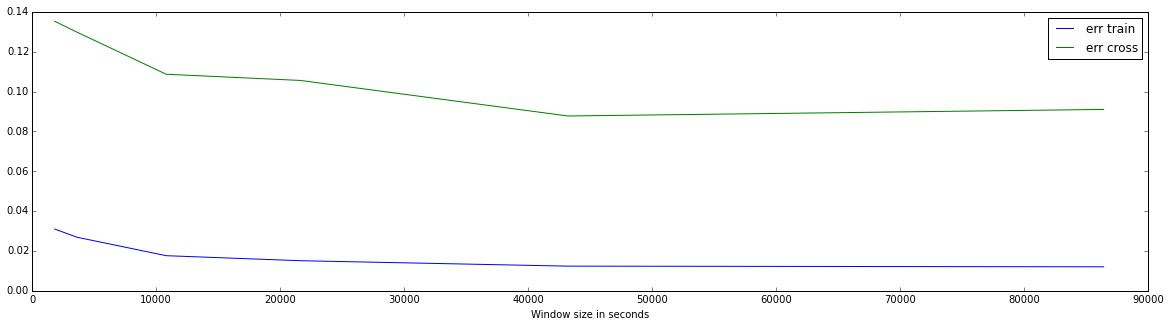

Best window size: 43200
Fitting an optimal degree of polynomial
2: Fitting... Scoring... Calc.err... train=0.0122992145393, cross=0.0872116453203
3: Fitting... Scoring... Calc.err... train=0.0122899913694, cross=0.08827561525
4: Fitting... Scoring... Calc.err... train=0.0123076535624, cross=0.0875193033124
5: Fitting... Scoring... Calc.err... train=0.0122974725455, cross=0.0879082242639
6: Fitting... Scoring... Calc.err... train=0.012257435176, cross=0.0878623788378
7: Fitting... Scoring... Calc.err... train=0.0121702258278, cross=0.0878490985333
8: Fitting... Scoring... Calc.err... train=0.0122359463601, cross=0.087445819039
9: Fitting... Scoring... Calc.err... train=0.0124328217917, cross=0.0878807285056


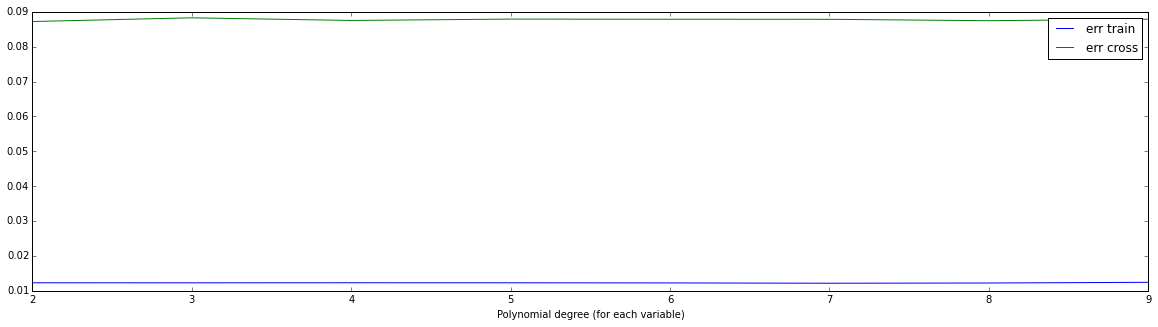

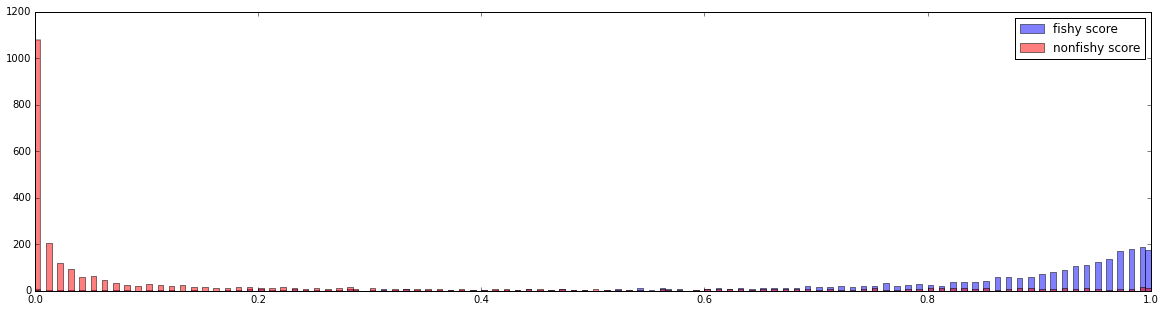

Squared numerical error: 0.08594839985
Error (overlap): 21.96%
False positives given cutoff at 0.5: 27.5704493526%


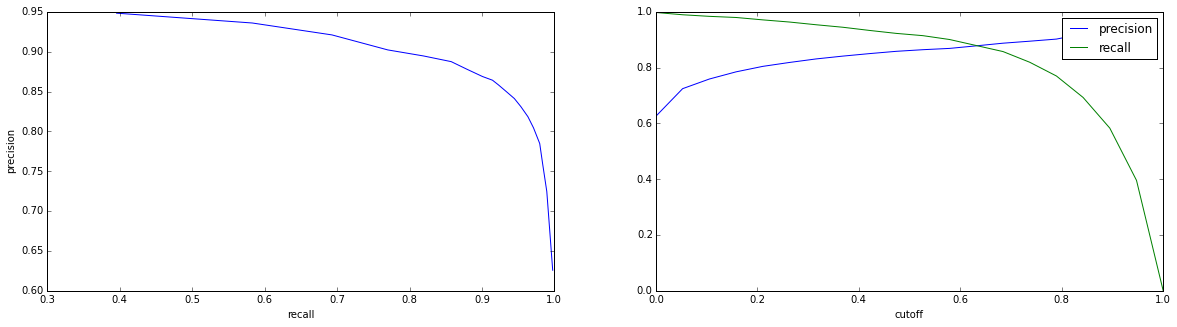

Score window: 43200


In [5]:
import imp, scoring
imp.reload(scoring)
from scoring import *
min_window = optimize_window_size(xtrain, xcross)
optimize_polynomial_degree(xtrain, xcross, min_window)
evaluate_score(xtrain, xtest, 4, min_window)

# Diferences between the datasets
How does the two labeled datasets differ in their labeleing? Alex only has labeled data for longliners, so that's what we'll compare:

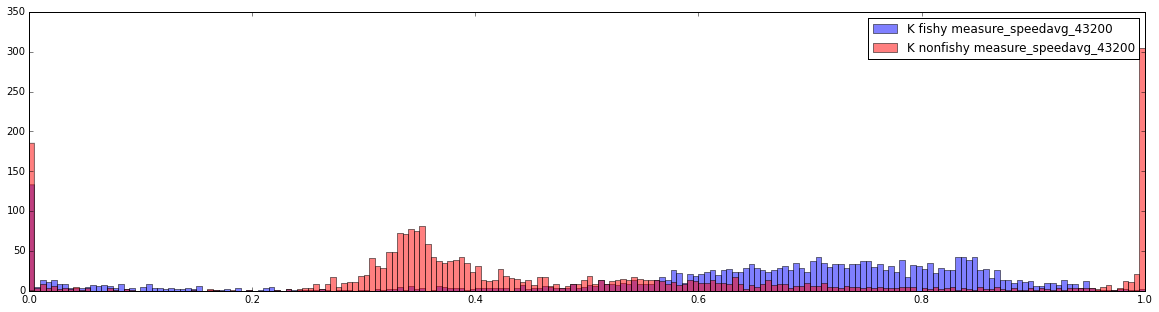

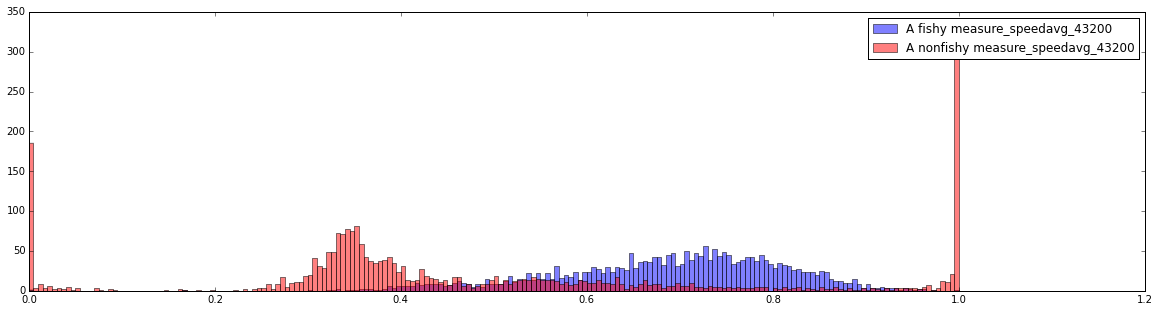

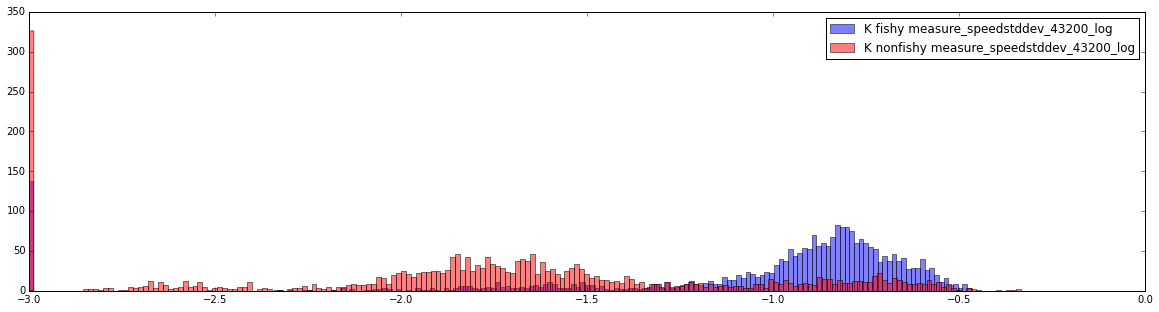

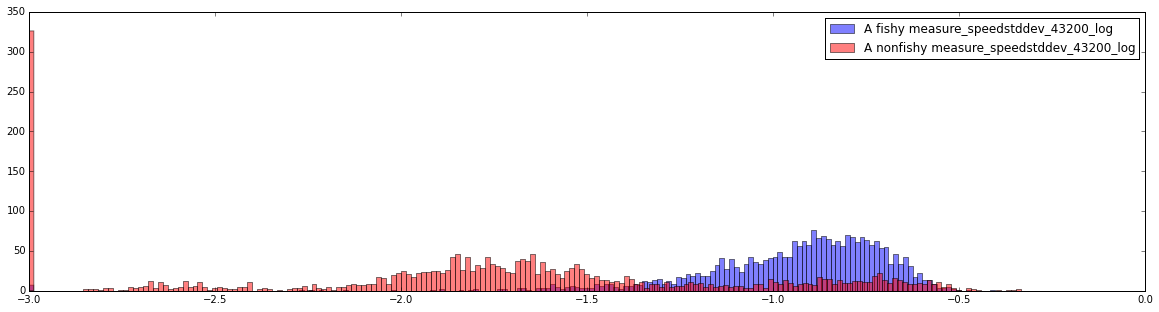

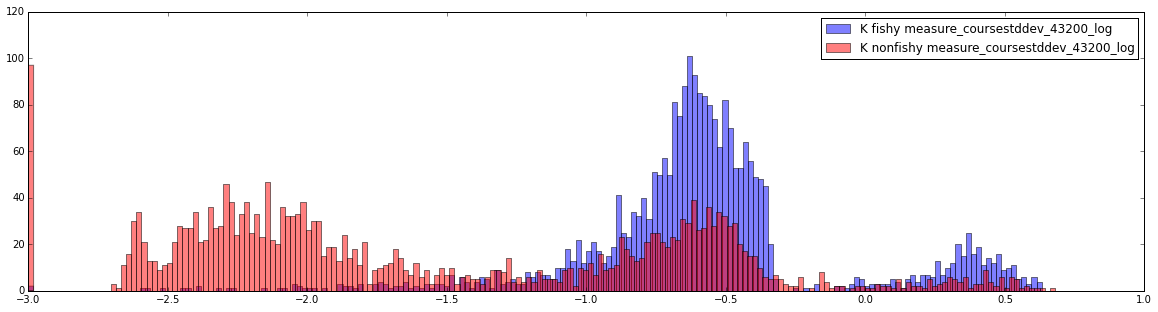

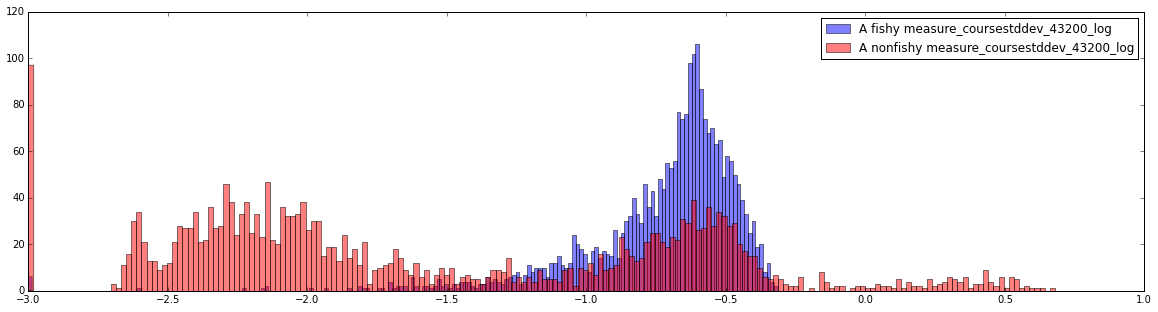

In [6]:
_x, _xtrain, _xcross, _xtest = load_dataset('classified-filtered.npz')
x, xtrain, xcross, xtest = load_dataset('datasets/kristina_longliner.measures.npz')

xfishy = fishy(xtest)
xnonfishy = nonfishy(xtest)
_xfishy = fishy(_xtest)
_xnonfishy = nonfishy(xtest)
window = 43200
for col in ('measure_speedavg_%s' % window,
        'measure_speedstddev_%s_log' % window,
        'measure_coursestddev_%s_log' % window):
    figure(figsize=(20,5))
    hist(xfishy[col], bins=200, normed=False, color='b', alpha=0.5, label="K fishy " + col)
    hist(xnonfishy[col], bins=200, normed=False, color='r', alpha=0.5, label="K nonfishy " + col)
    legend()
    show()

    figure(figsize=(20,5))
    hist(_xfishy[col], bins=200, normed=False, color='b', alpha=0.5, label="A fishy " + col)
    hist(_xnonfishy[col], bins=200, normed=False, color='r', alpha=0.5, label="A nonfishy " + col)
    legend()
    show()

# Trawlers

In [7]:
x, xtrain, xcross, xtest = load_dataset('datasets/kristina_trawl.measures.npz')

Fitting an optimal window size for avg/stddev columns
1800: Fitting... Scoring... Calc.err... train=0.0219310833673, cross=0.119545558134
3600: Fitting... Scoring... Calc.err... train=0.0191465660684, cross=0.115670723948
10800: Fitting... Scoring... Calc.err... train=0.0155360695008, cross=0.110987168227
21600: Fitting... Scoring... Calc.err... train=0.01556959, cross=0.10989626
43200: Fitting... Scoring... Calc.err... train=0.01683292, cross=0.12037378
86400: Fitting... Scoring... Calc.err... train=0.01804747, cross=0.12429114


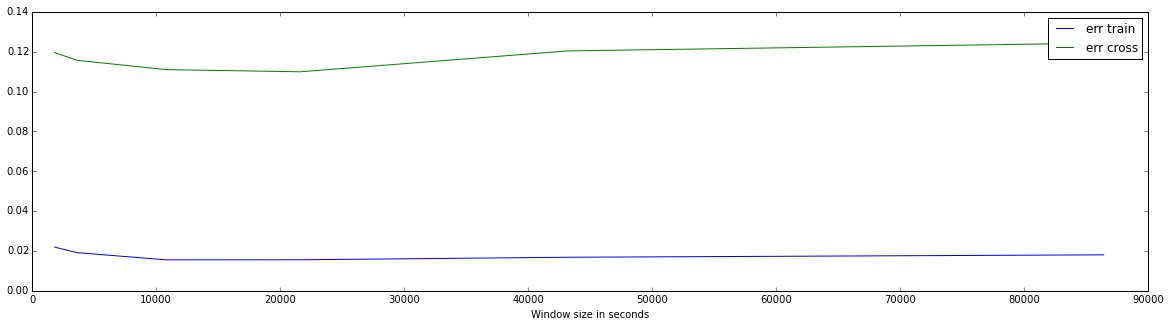

Best window size: 21600
Fitting an optimal degree of polynomial
2: Fitting... Scoring... Calc.err... train=0.01559689, cross=0.10923746
3: Fitting... Scoring... Calc.err... train=0.01560267, cross=0.10884694
4: Fitting... Scoring... Calc.err... train=0.01559509, cross=0.10973928
5: Fitting... Scoring... Calc.err... train=0.01567036, cross=0.109584
6: Fitting... Scoring... Calc.err... train=0.01553579, cross=0.1090381
7: Fitting... Scoring... Calc.err... train=0.01557744, cross=0.10975304
8: Fitting... Scoring... Calc.err... train=0.01567364, cross=0.10884472
9: Fitting... Scoring... Calc.err... train=0.01551175, cross=0.11013442


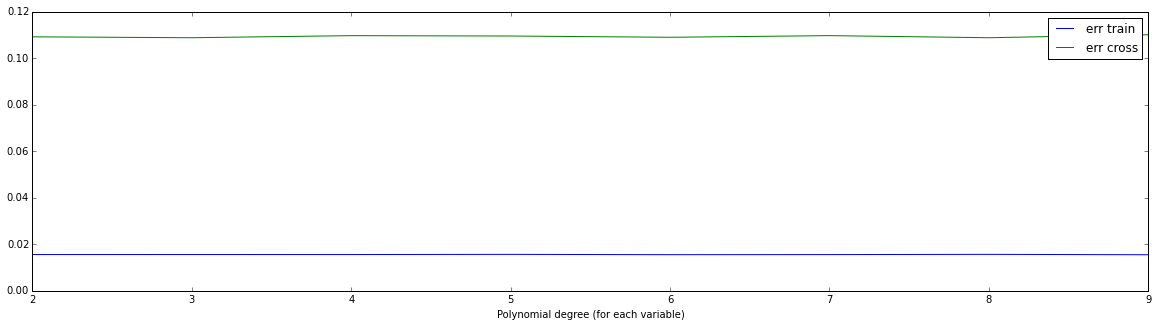

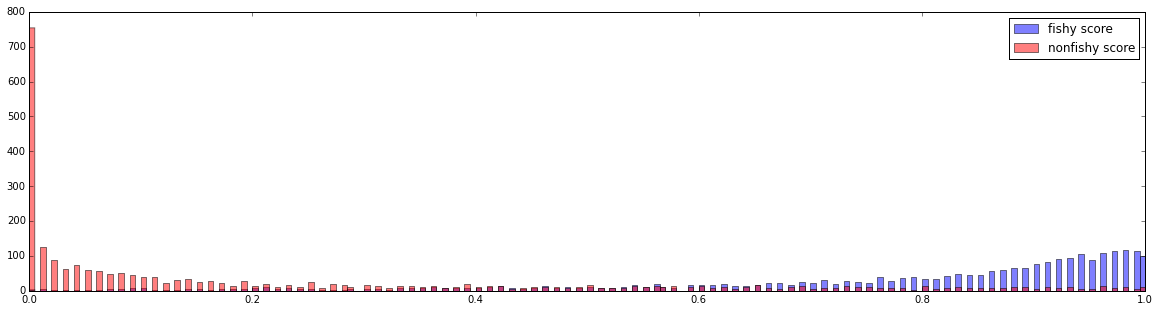

Squared numerical error: 0.11104406
Error (overlap): 30.28%
False positives given cutoff at 0.5: 35.0956130484%


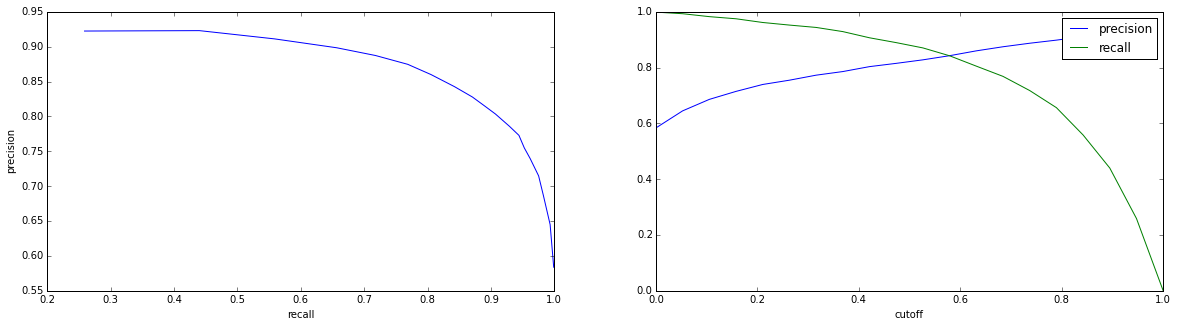

Score window: 21600


In [8]:
min_window = optimize_window_size(xtrain, xcross)
optimize_polynomial_degree(xtrain, xcross, min_window)
evaluate_score(xtrain, xtest, 3, min_window)

# Score all of Kristinas data and save it
train_and_score(xtrain, x, 3, min_window)
numpy.savez_compressed("datasets/kristina_trawl.scores.npz", x=x.filled())

# Purse seiners

In [9]:
x, xtrain, xcross, xtest = load_dataset('datasets/kristina_ps.measures.npz')

Fitting an optimal window size for avg/stddev columns
1800: Fitting... Scoring... Calc.err... train=0.0176769282475, cross=0.0808845087612
3600: Fitting... Scoring... Calc.err... train=0.015559359016, cross=0.0789245258381
10800: Fitting... Scoring... Calc.err... train=0.0126711403718, cross=0.0842986447754
21600: Fitting... Scoring... Calc.err... train=0.0128261099458, cross=0.0855583009799
43200: Fitting... Scoring... Calc.err... train=0.0139412976537, cross=0.100731276484
86400: Fitting... Scoring... Calc.err... train=0.0127566, cross=0.09168974


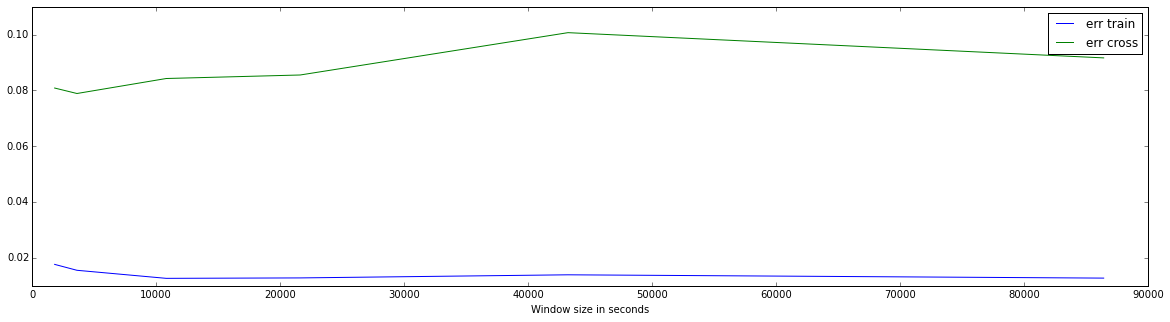

Best window size: 3600
Fitting an optimal degree of polynomial
2: Fitting... Scoring... Calc.err... train=0.0155792537993, cross=0.0788862018008
3: Fitting... Scoring... Calc.err... train=0.0155288661037, cross=0.079444295276
4: Fitting... Scoring... Calc.err... train=0.0156555374316, cross=0.0788071755886
5: Fitting... Scoring... Calc.err... train=0.0156154759925, cross=0.0790565520102
6: Fitting... Scoring... Calc.err... train=0.0156302042351, cross=0.0792704876868
7: Fitting... Scoring... Calc.err... train=0.0157537519831, cross=0.0795025532405
8: Fitting... Scoring... Calc.err... train=0.0154811989045, cross=0.0789647998881
9: Fitting... Scoring... Calc.err... train=0.0155468997824, cross=0.079167634754


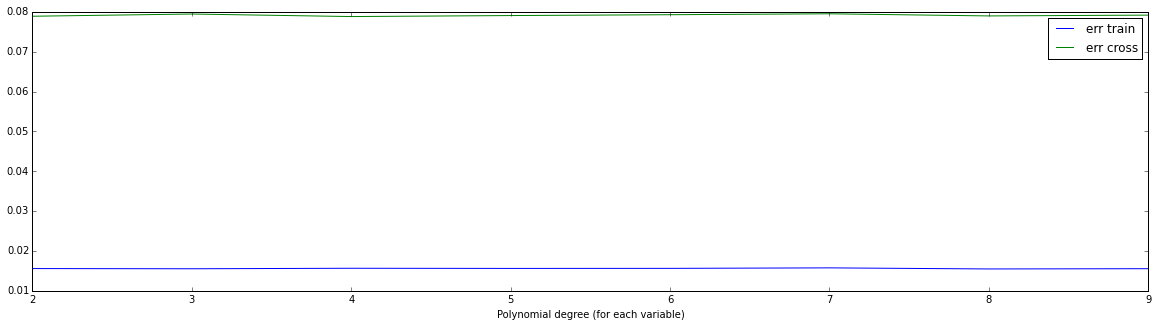

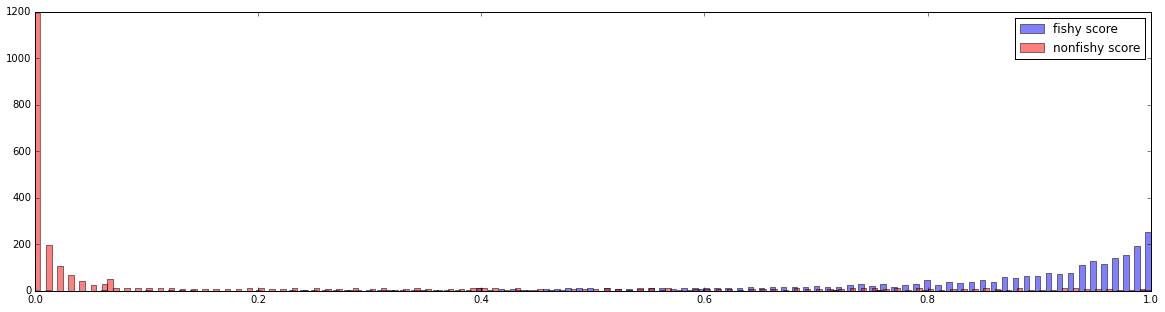

Squared numerical error: 0.0810373500616
Error (overlap): 7.84%
False positives given cutoff at 0.5: 4.1958041958%


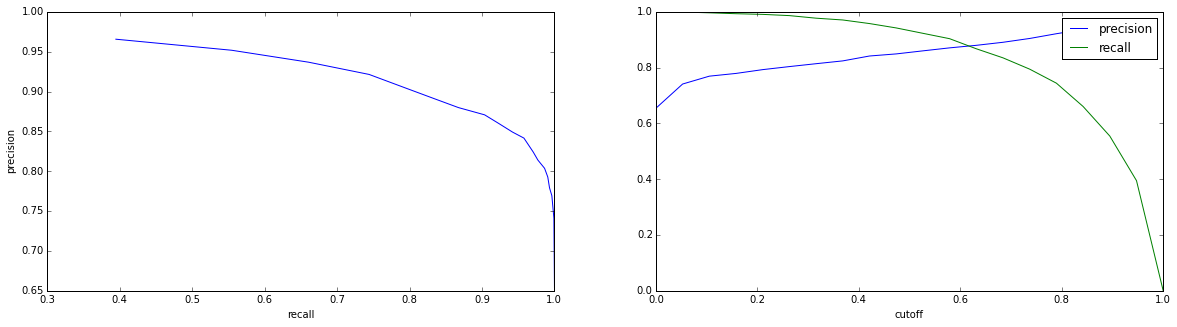

Score window: 3600


In [10]:
min_window = optimize_window_size(xtrain, xcross)
optimize_polynomial_degree(xtrain, xcross, min_window)
evaluate_score(xtrain, xtest, 4, min_window)

# Score all of Kristinas data and save it
train_and_score(xtrain, x, 4, min_window)
numpy.savez_compressed("datasets/kristina_ps.scores.npz", x=x.filled())